1.Uruchomić

    naive_multiplication(A,B),
    better_multiplication(A,B)
    mnożenie BLAS w Julii (A*B)

dla coraz większych macierzy i zmierzyć czasy. Narysować wykres zależyności czasu od rozmiaru macierzy wraz z słupkami błędów, tak jak na poprzednim laboratorium. Wszystkie trzy metody powinny być na jednym wykresie.

In [1]:
# mnożenie macierzy - wersja naiwna
function naive_multiplication(A,B)
C=zeros(Float64,size(A,1),size(B,2))
  for i=1:size(A,1)
    for j=1:size(B,2)
        for k=1:size(A,2)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

naive_multiplication (generic function with 1 method)

In [2]:
# poprawiona funkcja korzytająca z powyższego oraz z faktu, że
#można zmieniać kolejność operacji dodawania (a co za tym idzie kolejnosc petli).
function better_multiplication( A,B )
C=zeros(Float64,size(A,1),size(B,2))
  for j=1:size(B,2)
    for k=1:size(A,2)
        for i=1:size(A,1)
            C[i,j]=C[i,j]+A[i,k]*B[k,j]
        end
    end
end
C
end

better_multiplication (generic function with 1 method)

In [7]:
f = open("matrix_Multi.csv", "w")
write(f, "\"type\";\"test_number\";\"matrix_size\";\"time\"\n")

for i in [10,20,50,100,250,500,1000]
    A = rand(i,i)
    B = rand(i,i)
    for j=1:10
        time = @elapsed naive_multiplication(A,B)
        write(f, "naive;$j;$i;$time\n")
        time = @elapsed better_multiplication(A,B)
        write(f, "better;$j;$i;$time\n")
        time = @elapsed A*B
        write(f, "blas;$j;$i;$time\n")
    end
end

close(f)

In [44]:
using CSV
input="matrix_Multi.csv"
df=CSV.read(input, delim=";")

,type,test_number,matrix_size,time
,String⍰,Int64⍰,Int64⍰,Float64⍰
1,naive,1,10,2.04e-5
2,better,1,10,2.5e-6
3,blas,1,10,1.01e-5
4,naive,2,10,2.9e-6
5,better,2,10,2.2e-6
6,blas,2,10,7.0e-7
7,naive,3,10,2.8e-6
8,better,3,10,2.2e-6
9,blas,3,10,8.0e-7


In [45]:
using DataFrames, CSV, Statistics
df1=by(df, [:type, :matrix_size], :time => mean, :time => std)

,type,matrix_size,time_mean,time_std
,String⍰,Int64⍰,Float64,Float64
1,naive,10,4.58e-6,5.56453e-6
2,better,10,2.31e-6,1.85293e-7
3,blas,10,1.74e-6,2.93984e-6
4,naive,20,2.29698e-5,4.57005e-7
5,better,20,1.53499e-5,1.71627e-7
6,blas,20,3.0599e-6,7.58999e-7
7,naive,50,0.000430337,1.933e-5
8,better,50,0.000251778,1.28714e-5
9,blas,50,2.62597e-5,6.35022e-6


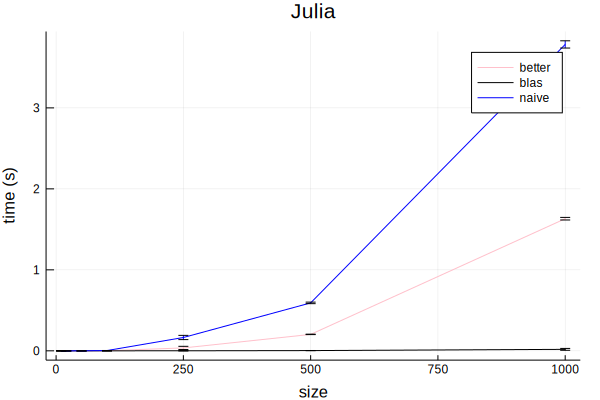

In [48]:
using Plots
plot(df1[:matrix_size], df1[:time_mean], yerr=df1[:time_std], group=df1[:type], colour=[:pink :black :blue], xlabel="size", ylabel="time (s)", title="Julia")

2.Napisać w języku C:

- naiwną metodę mnożenia macierzy (wersja 1) 
- ulepszoną za pomocą zamiany pętli metodę mnożenia macierzy (wersja 2), pamiętając, że w C macierz przechowywana jest wierszami (row major order tzn A11,A12, ..., A1m, A21, A22,...,A2m, ..Anm), inaczej niż w Julii ! 
- skorzystać z  możliwości BLAS dostępnego w GSL(wersja 3). 

Należy porównywać działanie tych trzech algorytmow bez włączonej opcji optymalizacji kompilatora. Przedstawić wyniki na jednym wykresie tak jak w p.1.(osobno niż p.1). (Dla chętnych) sprawdzić, co się dzieje, jak włączymy optymalizację kompilatora i dodać do wykresu.

In [ ]:
#include <stdio.h>
#include <gsl/gsl_blas.h>
#include <time.h>
#include <unistd.h>
#include <sys/times.h>
#include <limits.h>
#include <stdlib.h>
#include <sys/time.h>



double better_multi(double** A, double** B, int m, int n, int p);
double naive_multi(double** A, double** B, int m, int n, int p);
double blas_multi(double** A, double** B, int m, int n, int p);

void memFault(void);

int main(void){

    srand(time(NULL));

    FILE *fp;
    fp = fopen("matrix_Multi_in_C_with_opti.csv", "w");
    if(fp == NULL){
        fprintf(stderr, "Unable to open file\n");
        exit(EXIT_FAILURE);
    }
    fprintf(fp, "\"type\";\"test_number\";\"matrix_size\";\"time\"\n");

    int test_sizes[] = {10,20,50,100,250,500,750,1000};

    for (int i = 0; i < 8; ++i) {
        int s = test_sizes[i];

        double** a = malloc(s * sizeof(double*));
        if(a == NULL) memFault();

        double** b = malloc(s * sizeof(double*));
        if(b == NULL) memFault();

        for (int k = 0; k < s; ++k) {
            a[k] = malloc(s * sizeof(double));
            b[k] = malloc(s * sizeof(double));
        }



        for (int row = 0; row < s; ++row) {
            for (int col = 0; col < s; ++col) {
                a[row][col] = 0.69*(double)(rand()%100);
                b[row][col] = 0.69*(double)(rand()%100);
            }
        }

        for (int j = 0; j < 10; ++j) {
            fprintf(fp, "%s;%d;%d;%.6lf\n", "naive", j, test_sizes[i], naive_multi(a,b,s,s,s));
            fprintf(fp, "%s;%d;%d;%.6lf\n", "better", j, test_sizes[i], better_multi(a,b,s,s,s));
            fprintf(fp, "%s;%d;%d;%.6lf\n", "blas", j, test_sizes[i], blas_multi(a,b,s,s,s));
        }


        for (int k = 0; k < s; ++k) {
            free(a[k]);
            free(b[k]);
        }
        free(a);
        free(b);

    }


    fclose(fp);

    return 0;
}


double better_multi(double** A, double** B, int m, int n, int p){
    struct timeval start, end;


    double** C = malloc(m * sizeof(double*));

    for (int k = 0; k < m; ++k) {
        C[k] = malloc(p * sizeof(double));
    }



    for (int i = 0; i < m; ++i) {
        for (int j = 0; j < p; ++j) {
            C[i][j] = 0;
        }
    }

    gettimeofday(&start, NULL);

    for (int i = 0; i < m; ++i) {
        for (int j = 0; j < p; ++j) {
            for (int k = 0; k < n; ++k) {
                C[i][j] = C[i][j] + A[i][k] * B[k][j];
            }
        }
    }



    gettimeofday(&end, NULL);
    double time_taken;

    time_taken = (end.tv_sec - start.tv_sec) * 1e6;
    time_taken = (time_taken + (end.tv_usec - start.tv_usec)) * 1e-6;

    for (int l = 0; l < m; ++l) {
        free(C[l]);
    }

    free(C);

    return time_taken;
}

double naive_multi(double** A, double** B, int m, int n, int p){
    struct timeval start, end;


    double** C = malloc(m * sizeof(double*));

    for (int k = 0; k < m; ++k) {
        C[k] = malloc(p * sizeof(double));
    }


    for (int i = 0; i < m; ++i) {
        for (int j = 0; j < p; ++j) {
            C[i][j] = 0;
        }
    }

    gettimeofday(&start, NULL);

    for (int j = 0; j < p; ++j) {
        for (int k = 0; k < n; ++k) {
            for (int i = 0; i < m; ++i) {
                C[i][j] = C[i][j] + A[i][k] * B[k][j];
            }
        }
    }



    gettimeofday(&end, NULL);
    double time_taken;

    time_taken = (end.tv_sec - start.tv_sec) * 1e6;
    time_taken = (time_taken + (end.tv_usec - start.tv_usec)) * 1e-6;

    for (int l = 0; l < m; ++l) {
        free(C[l]);
    }

    free(C);

    return time_taken;
}

double blas_multi(double** A, double** B, int m, int n, int p){
    struct timeval start, end;

    double* c = malloc(m * p * sizeof(double));
    for (int i = 0; i < m; ++i) {
        for (int j = 0; j < p; ++j) {
            c[i*p + j] = 0;
        }
    }

    double* a = malloc(m * n * sizeof(double));
    for (int i = 0; i < m; ++i) {
        for (int j = 0; j < n; ++j) {
            a[i*n + j] = A[i][j];
        }
    }

    double* b = malloc(n * p * sizeof(double));
    for (int i = 0; i < n; ++i) {
        for (int j = 0; j < p; ++j) {
            b[i*p + j] = B[i][j];
        }
    }



    gsl_matrix_view m1 = gsl_matrix_view_array(a,(const size_t) m, (const size_t)n);
    gsl_matrix_view m2 = gsl_matrix_view_array(b, (const size_t)n, (const size_t)p);
    gsl_matrix_view res = gsl_matrix_view_array(c, (const size_t)m, (const size_t)p);


    gettimeofday(&start, NULL);

    gsl_blas_dgemm(CblasNoTrans, CblasNoTrans, 1.0, &m1.matrix, &m2.matrix, 0.0, &res.matrix);

    gettimeofday(&end, NULL);



    free(a);
    free(b);
    free(c);


    double time_taken;

    time_taken = (end.tv_sec - start.tv_sec) * 1e6;
    time_taken = (time_taken + (end.tv_usec - start.tv_usec)) * 1e-6;

    return time_taken;
}


void memFault(void){
    fprintf(stderr, "Memory allocation fault\n");
    exit(EXIT_FAILURE);
}

In [2]:
using CSV
input="matrix_Multi_in_C.csv"
dfc=CSV.read(input, delim=";")

,type,test_number,matrix_size,time
,String⍰,Int64⍰,Int64⍰,Float64⍰
1,naive,0,10,5.7e-5
2,better,0,10,5.7e-5
3,blas,0,10,5.0e-5
4,naive,1,10,5.8e-5
5,better,1,10,5.8e-5
6,blas,1,10,9.0e-6
7,naive,2,10,6.0e-5
8,better,2,10,5.5e-5
9,blas,2,10,1.0e-5


In [3]:
using DataFrames, CSV, Statistics
dfc1=by(dfc, [:type, :matrix_size], :time => mean, :time => std)

,type,matrix_size,time_mean,time_std
,String⍰,Int64⍰,Float64,Float64
1,naive,10,5.53e-5,2.79086e-6
2,better,10,5.41e-5,2.13177e-6
3,blas,10,1.37e-5,1.27632e-5
4,naive,20,0.0002851,9.33553e-5
5,better,20,0.0002378,1.90193e-5
6,blas,20,3.72e-5,6.32456e-7
7,naive,50,0.0015901,0.00106698
8,better,50,0.0014838,0.000992015
9,blas,50,0.0002143,0.000131021


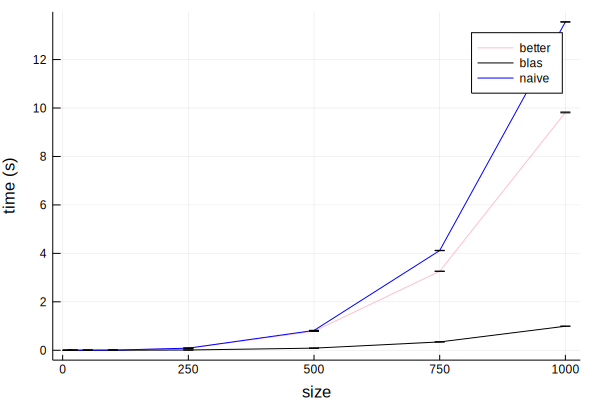

In [4]:
using Plots
plot(dfc1[:matrix_size], dfc1[:time_mean], yerr=dfc1[:time_std], group=dfc1[:type], colour=[:pink :black :blue], xlabel="size", ylabel="time (s)", title="C (no optimization)")

In [5]:
using CSV
input="matrix_Multi_in_C_with_opti.csv"
dfco=CSV.read(input, delim=";")

,type,test_number,matrix_size,time
,String⍰,Int64⍰,Int64⍰,Float64⍰
1,naive,0,10,7.0e-6
2,better,0,10,5.0e-6
3,blas,0,10,1.1e-5
4,naive,1,10,6.0e-6
5,better,1,10,5.0e-6
6,blas,1,10,5.0e-6
7,naive,2,10,5.0e-6
8,better,2,10,5.0e-6
9,blas,2,10,5.0e-6


In [6]:
using DataFrames, CSV, Statistics
dfco1=by(dfco, [:type, :matrix_size], :time => mean, :time => std)

,type,matrix_size,time_mean,time_std
,String⍰,Int64⍰,Float64,Float64
1,naive,10,5.6e-6,6.99206e-7
2,better,10,4.8e-6,4.21637e-7
3,blas,10,6.0e-6,1.82574e-6
4,naive,20,4.29e-5,3.16228e-7
5,better,20,4.59e-5,1.25206e-5
6,blas,20,3.95e-5,7.56086e-6
7,naive,50,0.0008696,0.000335622
8,better,50,0.0008422,0.000183698
9,blas,50,0.000683,0.000284799


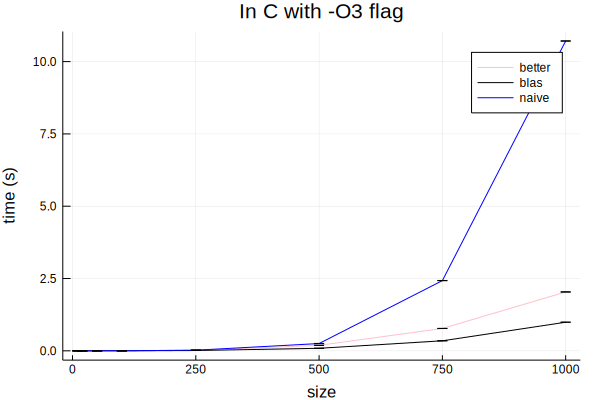

In [8]:
using Plots
plot(dfco1[:matrix_size], dfco1[:time_mean], yerr=dfco1[:time_std], group=dfco1[:type], colour=[:pink :black :blue], xlabel="size", ylabel="time (s)", title="C with -O3 flag")

3.Użyć funkcji polyfit z pakietu Polynomials do znalezienia odpowiednich wielomianow, ktore najlepiej pasują do zależności czasowych kazdego z algorytmow. Stopień wielomianu powinien zgadzać się z teoretyczną złożonoscią. Dodać wykresy uzyskanych wielomianow do wczesniejszych wykresów.

In [11]:
Pkg.add("Polynomials")
using Polynomials

 Resolving package versions...
  Updating `~/.julia/Project.toml`
 [no changes]
  Updating `~/.julia/Manifest.toml`
 [no changes]


In [30]:
using Polynomials
points = [10,20,50,100,250,500,750,1000]
naiveC = dfc1[dfc1[:,1] .== "naive", :]
ys = naiveC[:time_mean]
fit_naive_C = polyfit(points,ys,3)

betterC = dfc1[dfc1[:,1] .== "better", :]
ys = betterC[:time_mean]
fit_better_C = polyfit(points,ys,3)

blasC = dfc1[dfc1[:,1] .== "blas", :]
ys = blasC[:time_mean]
fit_blas_C = polyfit(points,ys,3)

Poly(-0.005716662876084743 + 0.00019650267616526656*x - 9.096100543542471e-7*x^2 + 1.7097783199307394e-9*x^3)

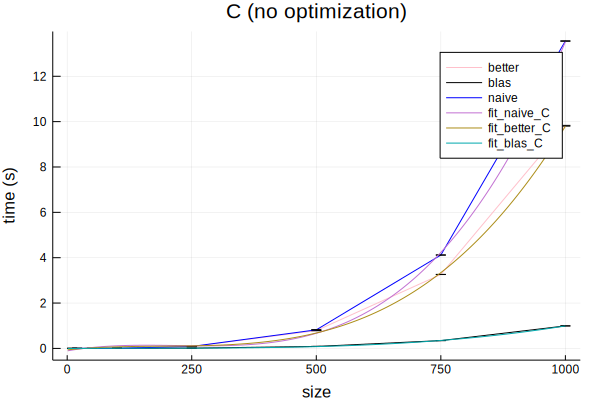

In [42]:
using Plots
plot(dfc1[:matrix_size], dfc1[:time_mean], yerr=dfc1[:time_std], group=dfc1[:type], colour=[:pink :black :blue], xlabel="size", ylabel="time (s)", title="C (no optimization)")
xd = 1:1:1000
plot!(xd,polyval(fit_naive_C, xd),label="fit_naive_C")
plot!(xd,polyval(fit_better_C, xd),label="fit_better_C")
plot!(xd,polyval(fit_blas_C, xd),label="fit_blas_C")

In [46]:
using Polynomials
points = [10,20,50,100,250,500,1000]
naiveJ = df1[df1[:,1] .== "naive", :]
ys = naiveJ[:time_mean]
fit_naive_J = polyfit(points,ys,3)

betterJ = df1[df1[:,1] .== "better", :]
ys = betterJ[:time_mean]
fit_better_J = polyfit(points,ys,3)

blasJ = df1[df1[:,1] .== "blas", :]
ys = blasJ[:time_mean]
fit_blas_J = polyfit(points,ys,3)

Poly(2.8327264940892608e-5 - 5.954386840154538e-7*x + 6.785454768880698e-9*x^2 + 1.1863398501270606e-11*x^3)

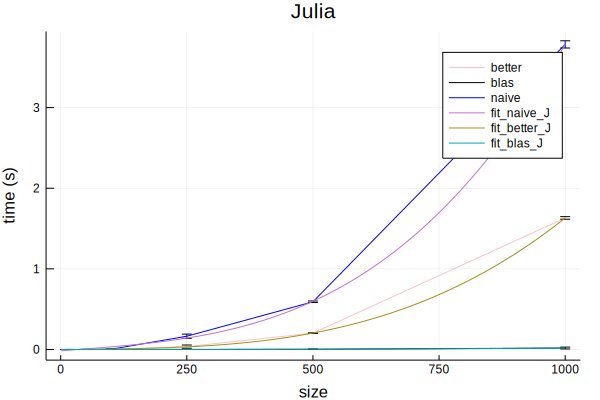

In [47]:
using Plots
plot(df1[:matrix_size], df1[:time_mean], yerr=df1[:time_std], group=df1[:type], colour=[:pink :black :blue], xlabel="size", ylabel="time (s)", title="Julia")
xd = 1:1:1000
plot!(xd,polyval(fit_naive_J, xd),label="fit_naive_J")
plot!(xd,polyval(fit_better_J, xd),label="fit_better_J")
plot!(xd,polyval(fit_blas_J, xd),label="fit_blas_J")